<a href="https://colab.research.google.com/github/eduardosousa1992/Data_Science_Introdu-o_a_Testes.ipynb/blob/main/Data_Science_Introdu%C3%A7%C3%A3o_a_Testes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import statsmodels as sm
sm.__version__

'0.10.2'

In [4]:
import pandas as pd

tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

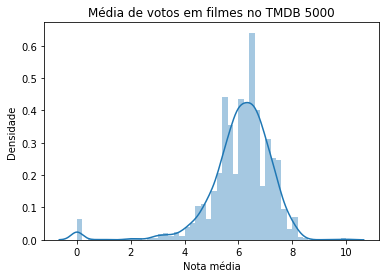

In [6]:
import seaborn as sns

ax = sns.distplot(tmdb.vote_average)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title("Média de votos em filmes no TMDB 5000")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

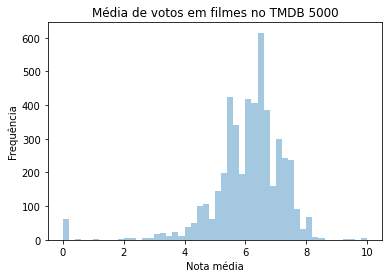

In [8]:
import seaborn as sns

ax = sns.distplot(tmdb.vote_average, norm_hist = False, kde = False)
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title("Média de votos em filmes no TMDB 5000")

Text(0.5, 1.0, 'Distribuição de nota média dos filmes do TMDB 5000')

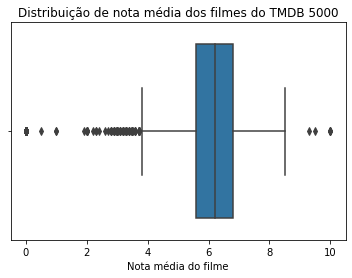

In [7]:
ax = sns.boxplot(x=tmdb.vote_average)
ax.set(xlabel="Nota média do filme")
ax.set_title("Distribuição de nota média dos filmes do TMDB 5000")

Tem algo de estranho com meus dados... não faz sentido filmes cuja nota média é 0 ou 10.... vamos ver?

In [9]:
tmdb.query("vote_average == 0")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4769,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 37, ""nam...",NaN,69382,[],en,The Legend of God's Gun,A gun-slinging preacher returns to the debauch...,0.003582,[],[],2007-07-08,0,78.0,[],Released,NaN,The Legend of God's Gun,0.0,0
4771,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,220490,[],en,Her Cry: La Llorona Investigation,"Crew of ""Paranormal Legends"" went to film thei...",0.056459,[],[],2013-04-19,0,89.0,[],Released,NaN,Her Cry: La Llorona Investigation,0.0,0
4780,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,366967,[],en,Dutch Kills,A desperate ex-con is forced to gather his old...,0.038143,[],[],2015-10-02,0,90.0,[],Released,NaN,Dutch Kills,0.0,0
4785,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,287625,[],en,Stories of Our Lives,Created by the members of a Nairobi-based arts...,0.327794,[],"[{""iso_3166_1"": ""KE"", ""name"": ""Kenya""}]",2014-09-05,0,60.0,"[{""iso_639_1"": ""sw"", ""name"": ""Kiswahili""}, {""i...",Released,NaN,Stories of Our Lives,0.0,0


In [10]:
tmdb.query("vote_average == 0").head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0


In [15]:
tmdb_com_mais_de_10_votos = tmdb.query("vote_count>=10")

In [17]:
tmdb_com_mais_de_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


In [18]:
tmdb.query("vote_average==10").head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1


Detectamos que alguns filmes tiveram poucos votos (ou até mesmo nenhum voto). Decidimos que esses filmes não devem pertencer a nossa análise

In [19]:
tmdb_com_mais_de_10_votos = tmdb.query("vote_count >= 10")
tmdb_com_mais_de_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos')

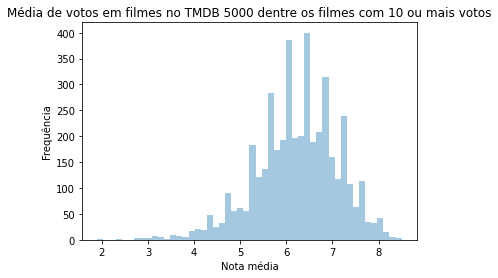

In [22]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average, norm_hist = False, kde = False)
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title("Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos')

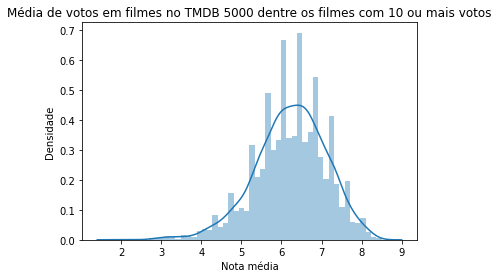

In [23]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title("Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos")

Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos')

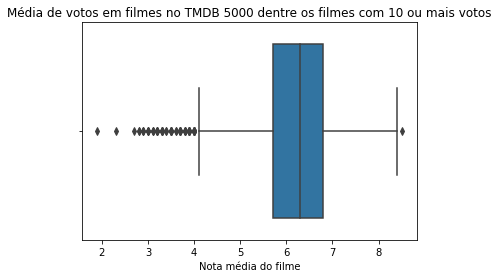

In [24]:
ax = sns.boxplot(x=tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel="Nota média do filme")
ax.set_title("Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000 com 10 ou mais votos')

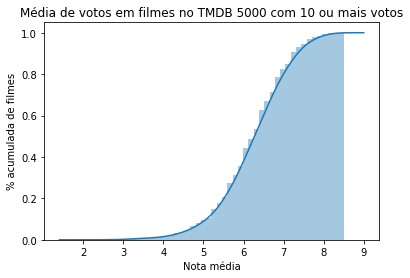

In [25]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average,
                          hist_kws = {'cumulative':True},
                          kde_kws = {'cumulative':True})
ax.set(xlabel="Nota média", ylabel="% acumulada de filmes")
ax.set_title("Média de votos em filmes no TMDB 5000 com 10 ou mais votos")

Text(0.5, 1.0, 'Distribuição de nota média dos filmes do TMDB 5000 dentre os filmes com 10 ou mais votos')

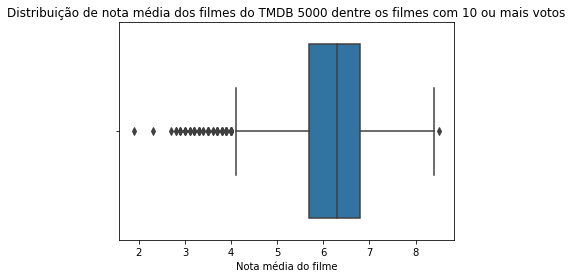

In [26]:
ax = sns.boxplot(x=tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel="Nota média do filme")
ax.set_title("Distribuição de nota média dos filmes do TMDB 5000 dentre os filmes com 10 ou mais votos")

# Analisaremos também o movielens

In [27]:
notas = pd.read_csv("ratings.csv")

In [28]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [31]:
notas.groupby("movieId").mean()

,userId,rating,timestamp
movieId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [33]:
notas.groupby("rating").mean()

,userId,movieId,timestamp
rating,,,
0.5,334.536496,28267.988321,1.326879e+09
1.0,329.784063,14819.926361,1.135150e+09
1.5,376.597990,30537.082077,1.326353e+09
2.0,325.257714,15496.788108,1.155335e+09
2.5,363.685946,25686.934595,1.319181e+09
3.0,326.648775,14853.203173,1.141352e+09
3.5,337.152406,26388.434074,1.297586e+09
4.0,320.366321,17858.161496,1.181583e+09
4.5,315.131096,27504.881067,1.308974e+09


In [34]:
nota_media_por_filme = notas.groupby("movieId").mean()["rating"]
nota_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no Movielens 100 Mil')

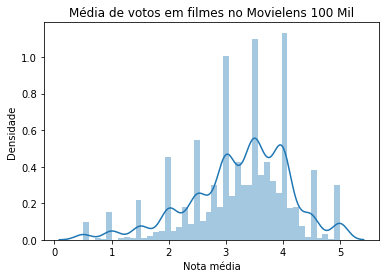

In [36]:
ax = sns.distplot(nota_media_por_filme.values)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title("Média de votos em filmes no Movielens 100 Mil")

In [37]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [39]:
notas.groupby("movieId").count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


In [43]:
quantidade_de_votos_por_filme = notas.groupby("movieId").count()
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filme.query("rating >= 10")
filmes_com_pelo_menos_10_votos.values

array([[215, 215, 215],
       [110, 110, 110],
       [ 52,  52,  52],
       ...,
       [ 13,  13,  13],
       [ 12,  12,  12],
       [ 12,  12,  12]])

In [44]:
quantidade_de_votos_por_filme = notas.groupby("movieId").count()
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filme.query("rating >= 10").index
filmes_com_pelo_menos_10_votos.values

array([     1,      2,      3, ..., 177765, 179819, 187593])

In [45]:
nota_media_por_filme

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

In [51]:
nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos.values]

movieId
1         3.920930
2         3.431818
3         3.259615
5         3.071429
6         3.946078
            ...   
174055    3.423077
176371    3.805556
177765    3.538462
179819    3.125000
187593    3.875000
Name: rating, Length: 2269, dtype: float64

In [52]:
nota_media_dos_filmes_com_pelo_menos_10_votos = nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos.values]
nota_media_dos_filmes_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no Movielens 100k com 10 ou mais votos')

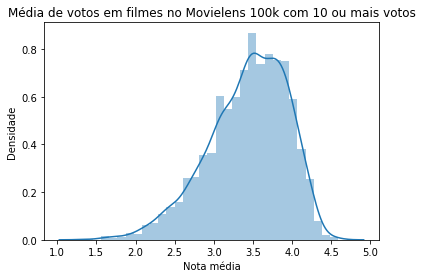

In [53]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title("Média de votos em filmes no Movielens 100k com 10 ou mais votos")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no Movielens 100k com 10 ou mais votos')

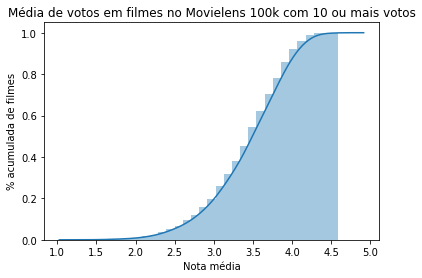

In [60]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values,
                          hist_kws = {'cumulative':True},
                          kde_kws = {'cumulative':True})
ax.set(xlabel="Nota média", ylabel="% acumulada de filmes")
ax.set_title("Média de votos em filmes no Movielens 100k com 10 ou mais votos")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Médias de votos em filmes no TMDB 5000 com 10 ou mais votos')

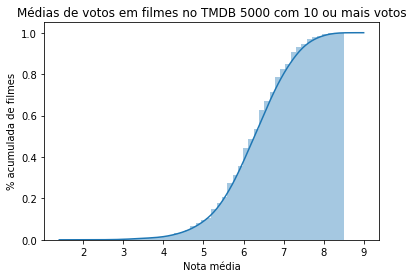

In [59]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average,
                          hist_kws = {'cumulative':True},
                          kde_kws = {'cumulative':True})
ax.set(xlabel="Nota média", ylabel="% acumulada de filmes")
ax.set_title("Médias de votos em filmes no TMDB 5000 com 10 ou mais votos")

Text(0.5, 1.0, 'Distribuição de nota média dos filmes do MovieLens 100 Mil dentre os filmes com 10 ou mais votos')

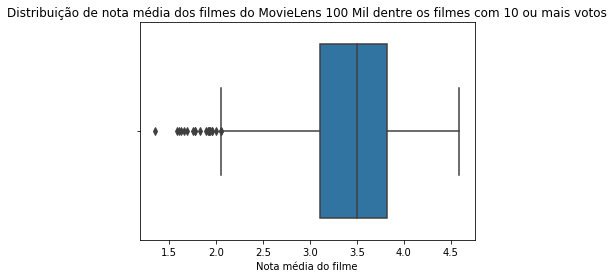

In [61]:
ax = sns.boxplot(x=nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel="Nota média do filme")
ax.set_title("Distribuição de nota média dos filmes do MovieLens 100 Mil dentre os filmes com 10 ou mais votos")

# Analisando a distribuição dos dados capturados de outros campos do TMDB

In [62]:
tmdb_com_mais_de_10_votos

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4790,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""n...",NaN,13898,[],fa,دایره,Various women struggle to function in the oppr...,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...","[{""iso_3166_1"": ""IR"", ""name"": ""Iran""}]",2000-09-08,0,90.0,"[{""iso_639_1"": ""fa"", ""name"": ""\u0641\u0627\u06...",Released,NaN,The Circle,6.6,17
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",NaN,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,"[{""name"": ""Daiei Studios"", ""id"": 881}]","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,Madness. Terror. Murder.,Cure,7.4,63
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://www.primermovie.com,14337,"[{""id"": 1448, ""name"": ""distrust""}, {""id"": 2101...",en,Primer,Friends/fledgling entrepreneurs invent a devic...,23.307949,"[{""name"": ""Thinkfilm"", ""id"":

In [65]:
tmdb_com_mais_de_10_votos.vote_count

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4790       17
4792       63
4796      658
4798      238
4802       16
Name: vote_count, Length: 4392, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Número de votos em filmes no TMDB 5000 com 10 ou mais votos')

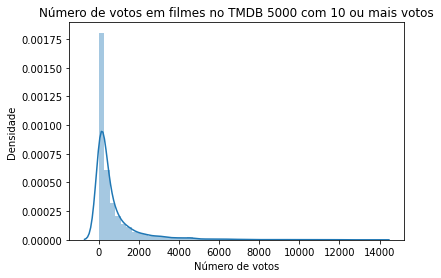

In [66]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_count)
ax.set(xlabel="Número de votos", ylabel="Densidade")
ax.set_title("Número de votos em filmes no TMDB 5000 com 10 ou mais votos")

In [68]:
tmdb.budget

0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
          ...    
4798       220000
4799         9000
4800            0
4801            0
4802            0
Name: budget, Length: 4803, dtype: int64

In [70]:
tmdb.query("budget > 0").budget

0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
          ...    
4791           13
4792        20000
4796         7000
4798       220000
4799         9000
Name: budget, Length: 3766, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Gastos em filmes no TMDB 5000')

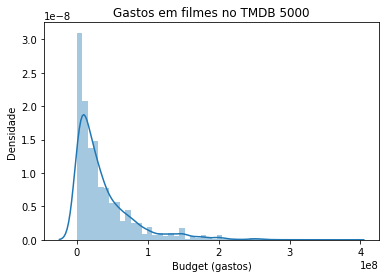

In [71]:

ax = sns.distplot(tmdb.query("budget > 0").budget)
ax.set(xlabel="Budget (gastos)", ylabel="Densidade")
ax.set_title("Gastos em filmes no TMDB 5000")



In [74]:
tmdb.popularity

0       150.437577
1       139.082615
2       107.376788
3       112.312950
4        43.926995
           ...    
4798     14.269792
4799      0.642552
4800      1.444476
4801      0.857008
4802      1.929883
Name: popularity, Length: 4803, dtype: float64

In [73]:
tmdb.query("popularity ==0 ")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularidade em filmes no TMDB 5000')

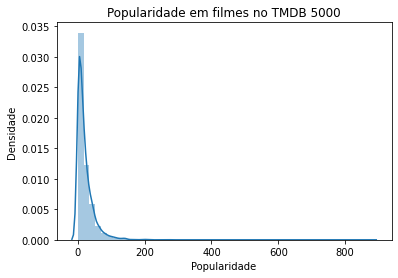

In [75]:
ax = sns.distplot(tmdb.popularity)
ax.set(xlabel="Popularidade", ylabel="Densidade")
ax.set_title("Popularidade em filmes no TMDB 5000")

In [76]:
tmdb.runtime

0       162.0
1       169.0
2       148.0
3       165.0
4       132.0
        ...  
4798     81.0
4799     85.0
4800    120.0
4801     98.0
4802     90.0
Name: runtime, Length: 4803, dtype: float64

In [78]:
tmdb.runtime.isnull().sum()

2

In [79]:
tmdb.runtime.dropna

<bound method Series.dropna of 0       162.0
1       169.0
2       148.0
3       165.0
4       132.0
        ...  
4798     81.0
4799     85.0
4800    120.0
4801     98.0
4802     90.0
Name: runtime, Length: 4803, dtype: float64>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Tempo de duração em filmes no TMDB 5000')

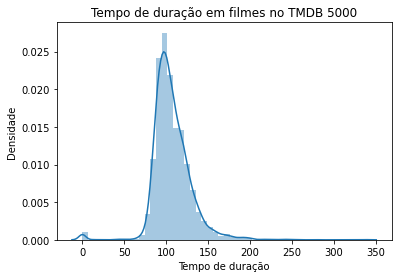

In [80]:
ax = sns.distplot(tmdb.runtime)
ax.set(xlabel="Tempo de duração", ylabel="Densidade")
ax.set_title("Tempo de duração em filmes no TMDB 5000")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Tempo de duração em filmes no TMDB 5000')

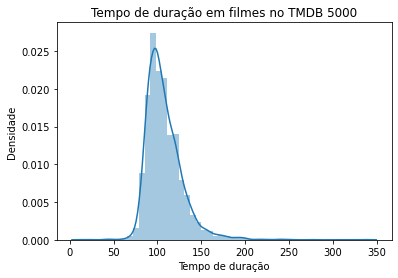

In [83]:
ax = sns.distplot(tmdb.query("runtime>0").runtime.dropna())
ax.set(xlabel="Tempo de duração", ylabel="Densidade")
ax.set_title("Tempo de duração em filmes no TMDB 5000")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Tempo de duração em filmes no TMDB 5000')

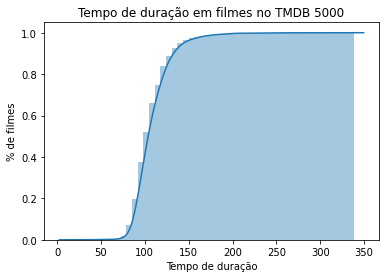

In [84]:
ax = sns.distplot(tmdb.query("runtime>0").runtime.dropna(),
                 hist_kws={'cumulative': True},
                 kde_kws={'cumulative': True}
                 )
ax.set(xlabel="Tempo de duração", ylabel="% de filmes")
ax.set_title("Tempo de duração em filmes no TMDB 5000")

In [85]:
tmdb.query("runtime>0").runtime.dropna().quantile(0.8)

121.0

# Movielens: média dos filmes com pelo menos 10 votos

In [87]:
nota_media_dos_filmes_com_pelo_menos_10_votos.mean()

3.4320503405352603

In [88]:
print("Média dos filmes com pelo menos 10 votos", nota_media_dos_filmes_com_pelo_menos_10_votos.mean())

Média dos filmes com pelo menos 10 votos 3.4320503405352603


In [89]:
nota_media_dos_filmes_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

In [93]:
nota_media_dos_filmes_com_pelo_menos_10_votos[0:1]

movieId
1    3.92093
Name: rating, dtype: float64

In [94]:
medias = list ()
for i in range (1, len(nota_media_dos_filmes_com_pelo_menos_10_votos)):
  medias.append(nota_media_dos_filmes_com_pelo_menos_10_votos[0:i].mean())

In [95]:
medias

[3.9209302325581397,
 3.676374207188161,
 3.5374545996639024,
 3.4209480926050695,
 3.5259741603585653,
 3.469175997829668,
 3.420007998139716,
 3.4295335135237663,
 3.4564107421798558,
 3.352874931119765,
 3.396552967684635,
 3.363506887044249,
 3.406839377909513,
 3.4332165225577675,
 3.451002087720583,
 3.405769002692592,
 3.3524884731224396,
 3.3603714480862994,
 3.3531004361987162,
 3.3416954143887807,
 3.331376585132172,
 3.3447231039898004,
 3.3514742733815486,
 3.3879658756270143,
 3.412973556391407,
 3.404174978311576,
 3.425614825316986,
 3.4337122869128076,
 3.4475781010027933,
 3.4424344719950075,
 3.4507430374145236,
 3.4223910131474935,
 3.4190609824460543,
 3.4086964437466603,
 3.4248871013004156,
 3.4171696491401096,
 3.4393473639752203,
 3.4400036363518125,
 3.4550555181639973,
 3.4495614831510744,
 3.455822178683975,
 3.433832556918074,
 3.441766683501375,
 3.4432967795375005,
 3.4437021502486327,
 3.4427521035040973,
 3.4283255881604555,
 3.4216342812642555,
 3.43275

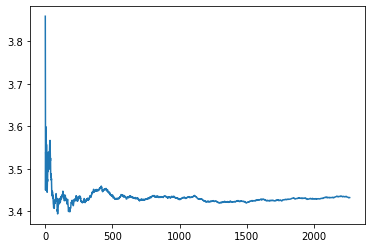

In [96]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(75243)
temp = nota_media_dos_filmes_com_pelo_menos_10_votos.sample(frac=1)

medias = [temp[0:i].mean() for i in range(1, len(temp))]

plt.plot(medias)

In [98]:
from statsmodels.stats.weightstats import zconfint

zconfint(nota_media_dos_filmes_com_pelo_menos_10_votos)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(3.4112459477469557, 3.452854733323563)

In [99]:
from statsmodels.stats.weightstats import DescrStatsW

descr_todos_com_10_votos = DescrStatsW(nota_media_dos_filmes_com_pelo_menos_10_votos)
descr_todos_com_10_votos.tconfint_mean()

(3.411234839229381, 3.4528658418411395)

# Vamos ver o filme 1...

In [101]:
filmes = pd.read_csv("movies.csv")
filmes.query("movieId==1")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [103]:
notas1 = notas.query("movieId == 1")
notas1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribuição das notas para o Toy Story')

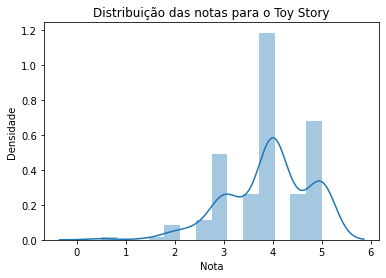

In [104]:
ax = sns.distplot(notas1.rating)
ax.set(xlabel="Nota", ylabel="Densidade")
ax.set_title("Distribuição das notas para o Toy Story")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribuição das notas para o Toy Story')

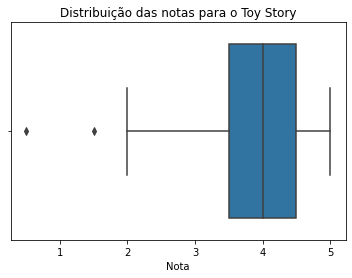

In [105]:
ax = sns.boxplot(notas1.rating)
ax.set(xlabel="Nota")
ax.set_title("Distribuição das notas para o Toy Story")

In [106]:
notas1.rating.mean()

3.9209302325581397

In [107]:
notas1.rating.count()

215

In [108]:
zconfint(notas1.rating)

(3.8093359183563402, 4.032524546759939)

In [109]:
from statsmodels.stats.weightstats import ztest

ztest(notas1.rating, value = 3.4320503405352594)

(8.586342305916732, 8.978190401885648e-18)

In [116]:
np.random.seed(75241)
temp = notas1.sample(frac=1).rating

def calcula_teste(i):
  media = temp[0:i].mean()
  stat, p = ztest(temp[0:i], value = 3.4320503405352594)
  return (i,media, p)
  medias = [calcula_teste(i) for i in range(2, len(temp))]
  medias

In [113]:
 medias

[3.859375,
 3.5179227941176467,
 3.4494485294117645,
 3.5392140566332912,
 3.5202601341955218,
 3.555344983624473,
 3.598458965555671,
 3.5634243221339394,
 3.5369327307857237,
 3.557048981516675,
 3.524589983196978,
 3.509329435816742,
 3.459660737956713,
 3.448256399531233,
 3.444563115752961,
 3.470349349589829,
 3.4755537131087664,
 3.4701367724076015,
 3.503287468596675,
 3.5023655194092655,
 3.5231319965069927,
 3.4932926633324324,
 3.5168226674753997,
 3.5394060367227484,
 3.5130678904919335,
 3.5132645800184674,
 3.512773299277043,
 3.5182694909695296,
 3.4988307310928373,
 3.51231056693813,
 3.5183650647788354,
 3.533416156504497,
 3.5537068038466937,
 3.5584864924457973,
 3.551458306947346,
 3.5667179776325,
 3.558158032291081,
 3.535794224423772,
 3.518494657415755,
 3.5250322909803615,
 3.4864016612146997,
 3.483749240709588,
 3.4798988355345233,
 3.4881860850706943,
 3.477695928341525,
 3.4729550469561743,
 3.476569985166833,
 3.4619719035793057,
 3.446264470696211,
 3.445

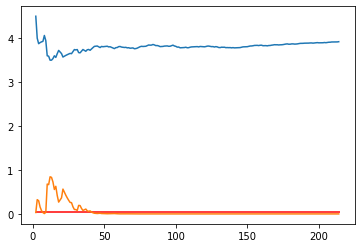

In [117]:
np.random.seed(75241)
temp = notas1.sample(frac=1).rating

def calcula_teste(i):
  media = temp[0:i].mean()
  stat, p = ztest(temp[0:i], value = 3.4320503405352594)
  return (i,media, p)

valores = np.array([calcula_teste(i) for i in range(2, len(temp))])

plt.plot(valores[:,0], valores[:,1])
plt.plot(valores[:,0], valores[:,2])
plt.hlines(y = 0.05, xmin = 2, xmax = len(temp), colors='r')

# Comparação de dois conjuntos de amostras

In [118]:
print(ztest(notas1.rating, notas.rating))
zconfint(notas1.rating, notas.rating)

(5.894327101501841, 3.762112778881965e-09)


(0.2799245129192442, 0.5588219849631111)

In [119]:
print(ztest(notas.rating, notas1.rating))
zconfint(notas.rating, notas1.rating)

(-5.894327101501841, 3.762112778881965e-09)


(-0.5588219849631111, -0.2799245129192442)

In [130]:
from scipy.stats import ttest_ind

ttest_ind(notas.rating, notas1.rating)


Ttest_indResult(statistic=-5.894327101501841, pvalue=3.774003138720876e-09)

In [129]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1.rating)
comparacao = descr_todas_as_notas.get_compare(descr_toystory)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


In [125]:
import statsmodels as am

In [128]:
print(am.__version__)

0.10.2


In [131]:
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

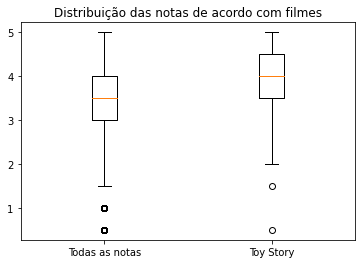

In [132]:
import matplotlib.pyplot as plt

plt.boxplot([notas.rating, notas1.rating], labels=["Todas as notas", "Toy Story"])
plt.title("Distribuição das notas de acordo com filmes")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

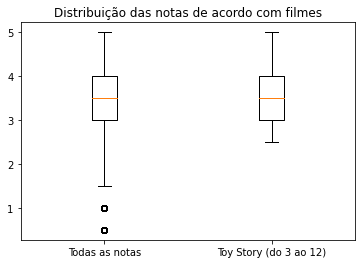

In [133]:
import matplotlib.pyplot as plt

plt.boxplot([notas.rating, notas1[3:12].rating], labels=["Todas as notas", "Toy Story (do 3 ao 12)"])
plt.title("Distribuição das notas de acordo com filmes")

In [134]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1[3:12].rating)
comparacao = descr_todas_as_notas.get_compare(descr_toystory)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0540,0.348,-0.155,0.877,-0.735,0.627


# Comparar a média de dois filmes

In [135]:
filmes.query("movieId in [1, 593, 72226]")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Distribuição das notas de acordo com os filmes')

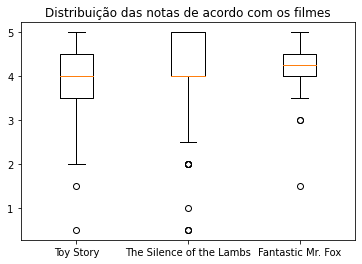

In [136]:
notas1 = notas.query("movieId == 1")
notas593 = notas.query("movieId == 593")
notas72226 = notas.query("movieId == 72226")

plt.boxplot([notas1.rating, notas593.rating, notas72226.rating], labels=["Toy Story", "The Silence of the Lambs", "Fantastic Mr. Fox"])
plt.title("Distribuição das notas de acordo com os filmes")

In [137]:
notas72226.describe()

,userId,movieId,rating,timestamp
count,18.000000,18.0,18.000000,1.800000e+01
mean,329.722222,72226.0,4.083333,1.395218e+09
std,174.748157,0.0,0.895249,9.459862e+07
min,73.000000,72226.0,1.500000,1.262899e+09
25%,167.000000,72226.0,4.000000,1.279706e+09
50%,326.000000,72226.0,4.250000,1.441777e+09
75%,466.250000,72226.0,4.500000,1.471770e+09
max,610.000000,72226.0,5.000000,1.498522e+09


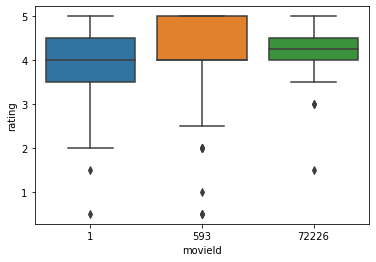

In [138]:
sns.boxplot(x = "movieId", y = "rating", data = notas.query("movieId in (1, 593, 72226)"))

In [139]:
notas.query("movieId in (1, 593, 72226)").groupby("movieId").count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
593,279,279,279
72226,18,18,18


In [140]:
descr_1 = DescrStatsW(notas1.rating)
descr_593 = DescrStatsW(notas593.rating)
comparacao = descr_1.get_compare(descr_593)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.2404,0.077,-3.132,0.002,-0.391,-0.090


In [141]:
descr_72226 = DescrStatsW(notas72226.rating)
descr_593 = DescrStatsW(notas593.rating)
comparacao = descr_72226.get_compare(descr_593)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0780,0.208,-0.374,0.708,-0.488,0.332


In [142]:
comparacao = descr_1.get_compare(descr_72226)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.1624,0.206,-0.788,0.431,-0.568,0.243


In [143]:
from scipy.stats import normaltest

_, p = normaltest(notas1.rating)
p

0.00011053430732728716

In [144]:
from scipy.stats import ranksums

_, p = ranksums(notas1.rating, notas593.rating)
p

0.0003267718756440693